## Part One  
#### Pythagorean Theorem of Baseball
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../stats/records.csv')
off_stats = pd.read_csv('../stats/offensive_stats.csv')
def_stats = pd.read_csv('../stats/defensive_stats.csv')

In [3]:
pythag_table = records.copy()

In [4]:
off_stats.head()

,team_id,team,year,wins,losses,win_%,singles,doubles,triples,home_runs,...,hits,ab,avg,obs,slugging,ops,so_%,hr_%,walk_%,hits_to_run
0,201501,chn,2015,97,65,0.598765,819,286,37,134,...,1276,5005,0.254945,0.315301,0.407193,0.722493,0.255810,0.023954,0.081337,1.851959
1,201502,sea,2015,77,85,0.475309,941,285,23,181,...,1430,5164,0.276917,0.346000,0.446166,0.792166,0.219658,0.030940,0.096410,2.179878
2,201503,mia,2015,71,91,0.438272,926,278,29,141,...,1374,4923,0.279098,0.349224,0.433272,0.782496,0.204836,0.025071,0.099573,2.241436
3,201504,tba,2015,80,82,0.493827,888,232,19,175,...,1314,5060,0.259684,0.326933,0.416798,0.743732,0.237820,0.030669,0.092008,2.040373
4,201505,phi,2015,63,99,0.388889,1068,300,33,191,...,1592,5174,0.307692,0.371770,0.489177,0.860947,0.195955,0.032461,0.093814,2.543131


In [5]:
def_stats.head()

,team_id,team,year,wins,losses,win_%,singles,doubles,triples,home_runs,...,trip/pa,hr/pa,avg,obs,slugging,ops,so_%,hr_%,walk_%,hits_to_run
0,201501,chn,2015,97,65,0.598765,819,286,37,134,...,0.006620,0.023976,0.254945,0.317033,0.407193,0.722493,0.256039,0.023976,0.081410,2.098684
1,201502,sea,2015,77,85,0.475309,941,285,23,181,...,0.003930,0.030924,0.276917,0.348115,0.446166,0.792166,0.219546,0.030924,0.096361,1.972414
2,201503,mia,2015,71,91,0.438272,926,278,29,141,...,0.005152,0.025049,0.279098,0.352727,0.433272,0.782496,0.204654,0.025049,0.099485,2.026549
3,201504,tba,2015,80,82,0.493827,888,232,19,175,...,0.003322,0.030600,0.259684,0.329275,0.416798,0.743732,0.237279,0.030600,0.091799,2.046729
4,201505,phi,2015,63,99,0.388889,1068,300,33,191,...,0.005613,0.032489,0.307692,0.374432,0.489177,0.860947,0.196122,0.032489,0.093894,1.967862


In [6]:
pythag_table.sort_values('team_id', inplace=True)
off_stats.sort_values('team_id', inplace=True)
def_stats.sort_values('team_id', inplace=True)

pythag_table['runs_scored'] = off_stats['runs']
pythag_table['runs_allowed'] = def_stats['runs']

In [7]:
pythag_table['pythag_win_estimate'] = ((pythag_table['runs_scored']**2) 
                                       / ((pythag_table['runs_scored']**2) + (pythag_table['runs_allowed']**2)))

In [8]:
pythag_table.head()

,team_id,team,year,wins,losses,win_%,runs_scored,runs_allowed,pythag_win_estimate
0,201501,chn,2015,97,65,0.598765,689,608,0.562209
1,201502,sea,2015,77,85,0.475309,656,725,0.450161
2,201503,mia,2015,71,91,0.438272,613,678,0.449779
3,201504,tba,2015,80,82,0.493827,644,642,0.501555
4,201505,phi,2015,63,99,0.388889,626,809,0.374515


In [9]:
pythag_table[['win_%', 'pythag_win_estimate']].corr()

,win_%,pythag_win_estimate
win_%,1.000000,0.942138
pythag_win_estimate,0.942138,1.000000


In [10]:
model_data = pythag_table[['runs_scored', 'runs_allowed', 'win_%']]

In [11]:
X = model_data[['runs_scored', 'runs_allowed']].to_numpy()
y = model_data['win_%'].to_numpy()

In [12]:
X[0]

array([689, 608])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [14]:
runs_scored = [i[0] for i in X_train]
runs_allowed = [i[1] for i in X_train]

In [15]:
def PythagPredict(runs_scored, runs_allowed, alpha):
    ''' This function runs a single instance of the simulation with a given alpha value for
        Pythagorean Theorem of Baseball: runs_scored^(alpha) / (runs_scored^(alpha) + runs_allowed^(alpha)).
        '''
    rsp = np.power(runs_scored, alpha)
    rap = np.power(runs_allowed, alpha)
    rsp_plus_rap = np.add(rsp, rap)

    np.divide(rsp, rsp_plus_rap)
    
    return np.divide(rsp, rsp_plus_rap)

def mean_absolute_error(predictions, observed):
    '''calculates the mean absolute error of predictions and observed values'''
    error = np.absolute(predictions - observed) / len(predictions)
    
    return np.sum(error)


def PythagOptimization(runs_scored, runs_allowed, win_percentage, alphas=np.linspace(0,4,401)):
    ''' This function runs a model over all alphas to determine the best fitting alpha value for 
        Pythagorean Theorem of Baseball. The loss function that we are minimizing in this function is
        Mean Absolute Error(MAE).'''
    
    error=float('inf')
    for alpha in alphas:
        local_prediction = PythagPredict(runs_scored, runs_allowed, alpha)
        local_error = mean_absolute_error(local_prediction, win_percentage)
        if local_error < error:
            error = local_error
            optimal_alpha = alpha
            optimal_prediction = local_prediction
        
    return optimal_alpha, optimal_prediction, error



In [16]:
alpha, predictions, error = PythagOptimization(runs_scored, runs_allowed, y_train)

In [17]:
alpha

1.82

In [18]:
predictions

array([0.59394194, 0.59386678, 0.50444514, 0.5208631 , 0.61219885,
       0.57291147, 0.36793883, 0.49349096, 0.43318329, 0.4277204 ,
       0.41768291, 0.36643787, 0.43464296, 0.51732849, 0.3051487 ,
       0.41252631, 0.575535  , 0.53822467, 0.57587273, 0.53331629,
       0.49042187, 0.4783428 , 0.49934296, 0.42190361, 0.62687213,
       0.53851089, 0.47506495, 0.58905081, 0.43651136, 0.5129425 ,
       0.62614632, 0.45908469, 0.51532416, 0.47498958, 0.49696871,
       0.42655355, 0.51165732, 0.5006413 , 0.47307956, 0.44386515,
       0.42554498, 0.4274677 , 0.44756271, 0.35948079, 0.54325772,
       0.48892503, 0.56302057, 0.43705364, 0.54101627, 0.48624174,
       0.54082847, 0.49369829, 0.48116967, 0.37769232, 0.43078074,
       0.44587657, 0.6629997 , 0.5511122 , 0.53810055, 0.54615623,
       0.60134817, 0.48225806, 0.55733276, 0.39447224, 0.5005975 ,
       0.54031823, 0.38098121, 0.53804164, 0.56462373, 0.34160333,
       0.43620652, 0.54904094, 0.65742015, 0.6104693 , 0.44581

In [19]:
error

0.019981203301824627

In [20]:
runs_scored_test = [i[0] for i in X_test]
runs_allowed_test = [i[1] for i in X_test]

In [21]:
test = PythagPredict(runs_scored_test, runs_allowed_test, alpha)
original = PythagPredict(runs_scored_test, runs_allowed_test, 2)

In [22]:
mae_test = mean_absolute_error(test, y_test)
mae_original = mean_absolute_error(original, y_test)

In [23]:
print(f'Error (alpha = {alpha}): {mae_test}')
print(f'Error (alpha = 2): {mae_original}')

Error (alpha = 1.82): 0.021662758781573904
Error (alpha = 2): 0.022567273531022215


#### To reach a complete error, the model needs to be run numerous times as to determine the accuracy of the model

In [24]:
trials = 100
sim = np.empty(trials)
for trial in range(trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    
    runs_scored = [i[0] for i in X_train]
    runs_allowed = [i[1] for i in X_train]
    
    sim[trial] = (PythagOptimization(runs_scored, runs_allowed, y_train)[0])

In [25]:
mean = sim.mean()
sd = sim.std()

In [26]:
mean

1.8177

In [27]:
sd

0.031838812791936844

In [28]:
z_score99 = 2.58

In [29]:
margin = z_score99 * sd/(trials**0.5)

In [30]:
confidence_interval = (mean - margin, mean + margin)

In [31]:
confidence_interval

(1.8094855862996804, 1.8259144137003198)

In [32]:
print(f'True alpha: {mean} ' + u'\u00B1' + f' {margin}' )

True alpha: 1.8177 ± 0.008214413700319705


In [33]:
alpha = mean

In [34]:
pythag_table['model_pythag_win_%'] = (pythag_table['runs_scored']**alpha) / ((pythag_table['runs_scored']**alpha) + (pythag_table['runs_allowed']**alpha))

In [35]:
pythag_table.head()

,team_id,team,year,wins,losses,win_%,runs_scored,runs_allowed,pythag_win_estimate,model_pythag_win_%
0,201501,chn,2015,97,65,0.598765,689,608,0.562209,0.556590
1,201502,sea,2015,77,85,0.475309,656,725,0.450161,0.454677
2,201503,mia,2015,71,91,0.438272,613,678,0.449779,0.454330
3,201504,tba,2015,80,82,0.493827,644,642,0.501555,0.501413
4,201505,phi,2015,63,99,0.388889,626,809,0.374515,0.385529


In [36]:
pythag_corr = pythag_table[['win_%', 'pythag_win_estimate', 'model_pythag_win_%']].corr()

In [37]:
pythag_corr['win_%']

win_%                  1.000000
pythag_win_estimate    0.942138
model_pythag_win_%     0.942091
Name: win_%, dtype: float64

In [38]:
pythag_table.sort_values('win_%', inplace=True)

In [39]:
pythag_table.head()

,team_id,team,year,wins,losses,win_%,runs_scored,runs_allowed,pythag_win_estimate,model_pythag_win_%
112,201823,bal,2018,47,115,0.290123,622,892,0.327161,0.341790
128,201909,det,2019,47,113,0.293750,579,910,0.288171,0.305369
142,201923,bal,2019,54,107,0.335404,725,976,0.355584,0.368098
122,201903,mia,2019,56,104,0.350000,605,796,0.366156,0.377841
95,201806,kca,2018,58,104,0.358025,638,833,0.369726,0.381126


In [112]:
%matplotlib qt

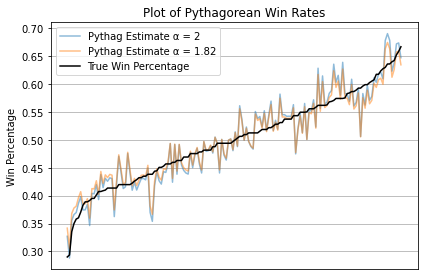

In [40]:
index = np.arange(1, len(pythag_table)+1)

plt.plot(index, pythag_table['pythag_win_estimate'], label='Pythag Estimate \u03B1 = 2', alpha=.5)
plt.plot(index, pythag_table['model_pythag_win_%'], label=f'Pythag Estimate \u03B1 = {round(alpha, 2)}', alpha=.5)
plt.plot(index, pythag_table['win_%'], color='#000000', label='True Win Percentage')

plt.xticks([])
plt.ylabel('Win Percentage')
plt.title('Plot of Pythagorean Win Rates')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

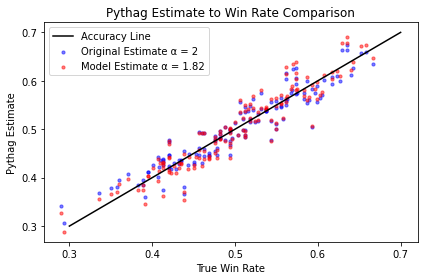

In [41]:
line = [.3,.7]
plt.scatter(pythag_table['win_%'], pythag_table['model_pythag_win_%'], label='Original Estimate \u03B1 = 2', color='blue', s=10, alpha=.5)
plt.scatter(pythag_table['win_%'], pythag_table['pythag_win_estimate'], label=f'Model Estimate \u03B1 = {round(alpha, 2)}', color='red', s=10, alpha=.5)
plt.plot(line, line, color='#000000', label='Accuracy Line')

plt.legend()
plt.title('Pythag Estimate to Win Rate Comparison')
plt.ylabel(f'Pythag Estimate')
plt.xlabel('True Win Rate')
plt.tight_layout()
plt.show()

In [42]:
pythag_table.to_csv('../stats/pythag_table.csv', index=False)